In [346]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import ticker
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVC

%matplotlib inline


In [347]:
df = pd.read_csv('Titanic Dataset.csv')
print(df.shape)
df.head()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [348]:
df.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Data Description
| Column | Description |
| ----------- | ----------- |
| PassengerId | Passenger ID in dataset |
| Survived | Survived (1) or Died (0) |
| Pclass | Passenger's Class |
| Name | Passenger's Name |
| Sex | Passenger's Sex |
| Age | Passenger's Age |
| SibSp | Number of siblings/spouces on onboard |
| Parch | Number of parents/children on onboard |
| Ticket | Ticket Number |
| Fare | Fare |
| Cabin | Cabin |
| Embarked | Port of Embarkation |

In [349]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Columns Age, Cabin and Embarked have null values.

## Null/NaN Data

In [350]:
# collect all nan rows in a dictionary
# dict keys are column names
nan_rows = {}
for col in ['Age', 'Cabin', 'Embarked']:
    nan_rows[col] = df[df[col].isna()]

# nan_rows['Age']


In [351]:
# collect all nan rows in a new dataframe
df_nan = df[df.isna().any(axis=1)]
df_nan.head(7)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Fill Null/NaN Data

In [352]:
# understand the unique values for each column
# that contains NaN
for col in ['Age', 'Cabin', 'Embarked']:
    print(f'{col}:', df[col].unique())


Age: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
Cabin: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B3

In [353]:
# fill NaN Age with the mean value of ages
df['Age'].fillna(value=df['Age'].mean(numeric_only=True), inplace=True)


In [354]:
# fill NaN Cabin and Embared with 'Not Available'
df['Cabin'].fillna(value='NotAvailable', inplace=True)
df['Embarked'].fillna(value='NotAvailable', inplace=True)


In [355]:
df[df.isna().any(axis=1)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Family Size

First we check in the case of SibSp = 1, if the dataframe includes that sibling/spouse indeed.

In [356]:
df['Name'].str.contains('Braund').sum()


2

In [357]:
df[(df['Name'].str.contains('Braund'))]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NotAvailable,S
477,478,0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NotAvailable,S


We then check in the case of Parch = 1, if the dataframe includes that parent/child indeed.

In [358]:
df['Name'].str.contains('Palsson').sum()


4

In [359]:
df[(df['Name'].str.contains('Palsson'))]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NotAvailable,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,NotAvailable,S
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.075,NotAvailable,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NotAvailable,S


In [360]:
df['Name'].str.contains('Johnson').sum()


6

In [361]:
df[(df['Name'].str.contains('Johnson'))]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NotAvailable,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NotAvailable,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NotAvailable,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NotAvailable,S
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NotAvailable,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NotAvailable,S


We can now create a new column called FamilySize where we add all siblings, spouces, parents, children, and the passenger.

In [362]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [363]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NotAvailable,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NotAvailable,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NotAvailable,S,1


## Family Name

Let's just add the family name.

In [364]:
df['FamilyName'] = df['Name'].apply(lambda x: x.split(',')[0])


In [365]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NotAvailable,S,2,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NotAvailable,S,1,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NotAvailable,S,1,Allen


In [366]:
df['FamilyName'].value_counts()


Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: FamilyName, Length: 667, dtype: int64

In [367]:
df[(df['Fare'] == 0)].count()


PassengerId    15
Survived       15
Pclass         15
Name           15
Sex            15
Age            15
SibSp          15
Parch          15
Ticket         15
Fare           15
Cabin          15
Embarked       15
FamilySize     15
FamilyName     15
dtype: int64

## Data Anlysis

The provided data set contains the following:
- 891 rows
    - 147 unique cabins
    - 3 unique embarkation places
    - 681 uniqe tickets
    - 667 uniqe families
- 3 columns contained null rows
    - Age; 177 nulls
    - Cabin; 687 nulls
    - Embarked; 2 nulls
- Average age of passengers ~29.699118 years old
- Majority of passengers are males
- 15 passengers rode at $0 fare

## Data Visualization

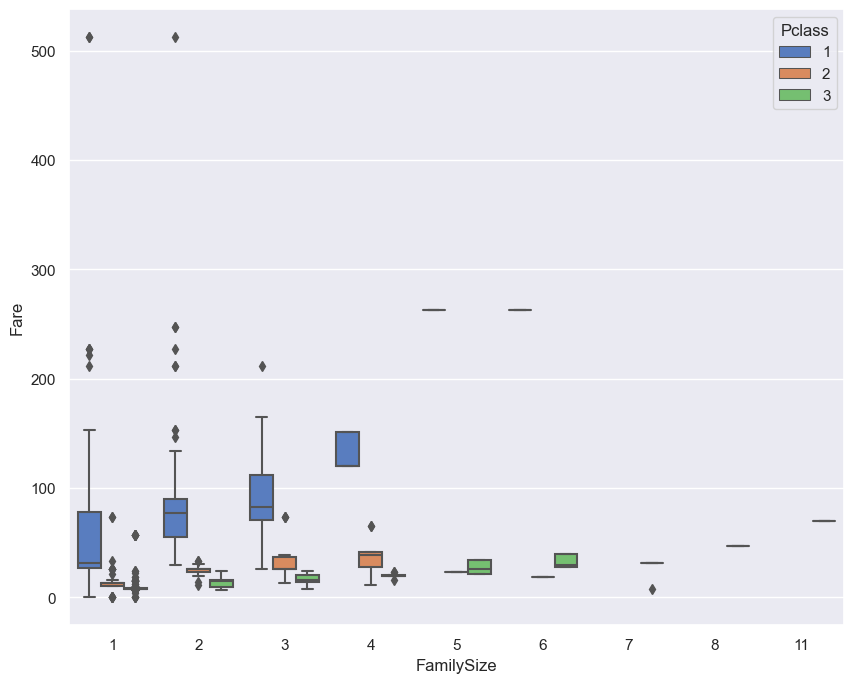

In [368]:
fig, axes = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(data=df, x=df['FamilySize'], y=df['Fare'], hue=df['Pclass'])


The bigger the family the less outliers.

In [369]:
# family size = 1 / class = 1 / fare > 200
df[(df['FamilySize'] == 1) & (df['Pclass'] == 1) & (df['Fare'] > 200)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyName
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,NotAvailable,C,1,Ward
380,381,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.5250,NotAvailable,C,1,Bidois
527,528,0,1,"Farthing, Mr. John",male,29.699118,0,0,PC 17483,221.7792,C95,S,1,Farthing
557,558,0,1,"Robbins, Mr. Victor",male,29.699118,0,0,PC 17757,227.5250,NotAvailable,C,1,Robbins
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.000000,0,0,PC 17757,227.5250,C45,C,1,Endres
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,1,Allen
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.000000,0,0,PC 17755,512.3292,B101,C,1,Lesurer


In [370]:
# family size = 2 / class = 1 / fare > 150
df[(df['FamilySize'] == 2) & (df['Pclass'] == 1) & (df['Fare'] > 150)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyName
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,2,Baxter
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S,2,Graham
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,2,Baxter
332,333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S,2,Graham
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2,Cardeza
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S,2,Madill
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,2,Astor
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S,2,Robert


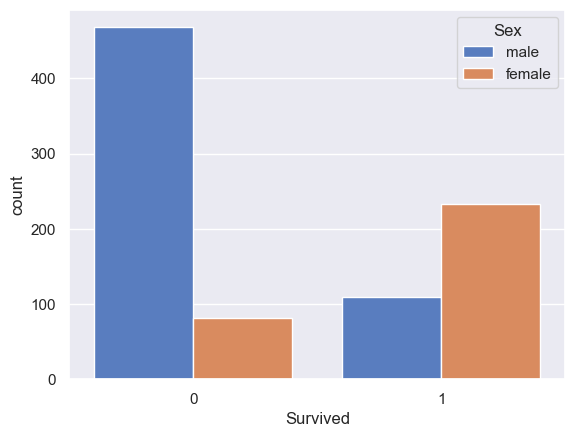

In [371]:
# fig, axes = plt.subplots(figsize=(10,8))
ax = sns.countplot(x=df['Survived'], hue=df['Sex'])


Most males died.

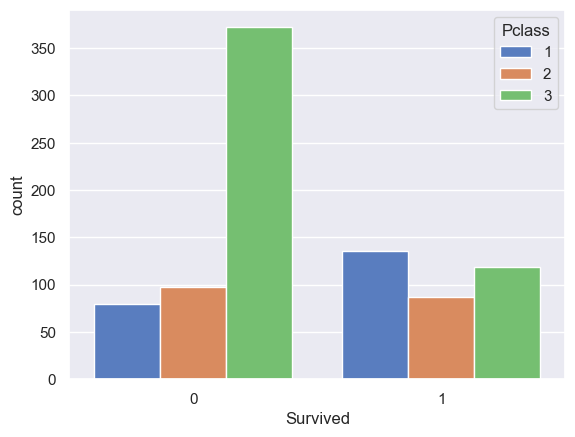

In [372]:
# fig, axes = plt.subplots(figsize=(10,8))
ax = sns.countplot(x=df['Survived'], hue=df['Pclass'])


Most passengers in 3rd class died.

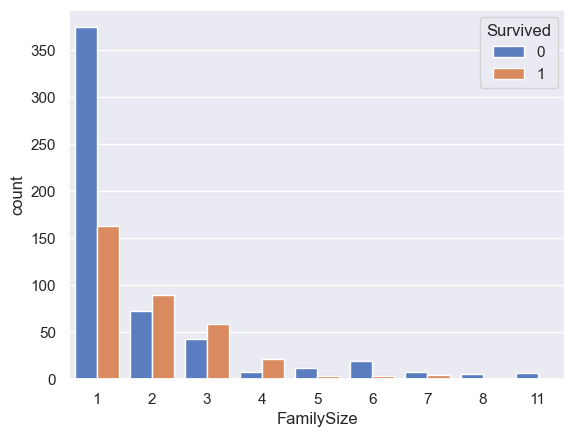

In [373]:
# fig, axes = plt.subplots(figsize=(10,8))
ax = sns.countplot(x=df['FamilySize'], hue=df['Survived'])


Most solo-passengers died. For families sized between 2 and 4, we can see a higher number of survivals.

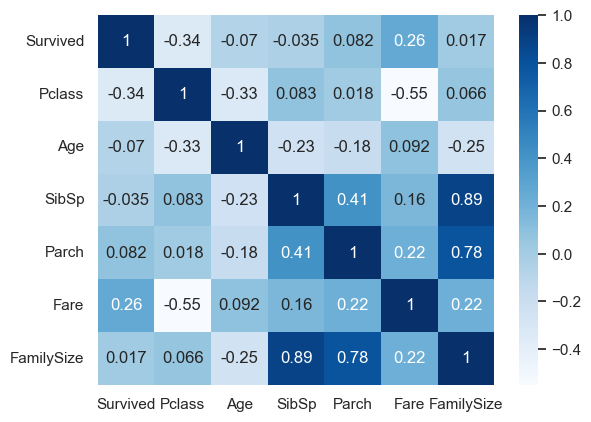

In [374]:
ax = sns.heatmap(df.drop('PassengerId', axis=1).corr(
    numeric_only=True), cmap="Blues", annot=True)


It seems the highest correlation is between the class and the passenger survivability. Strangely fare comes in second, when it was expected that family size would have a higher correlation with a passenger's survivabilty.

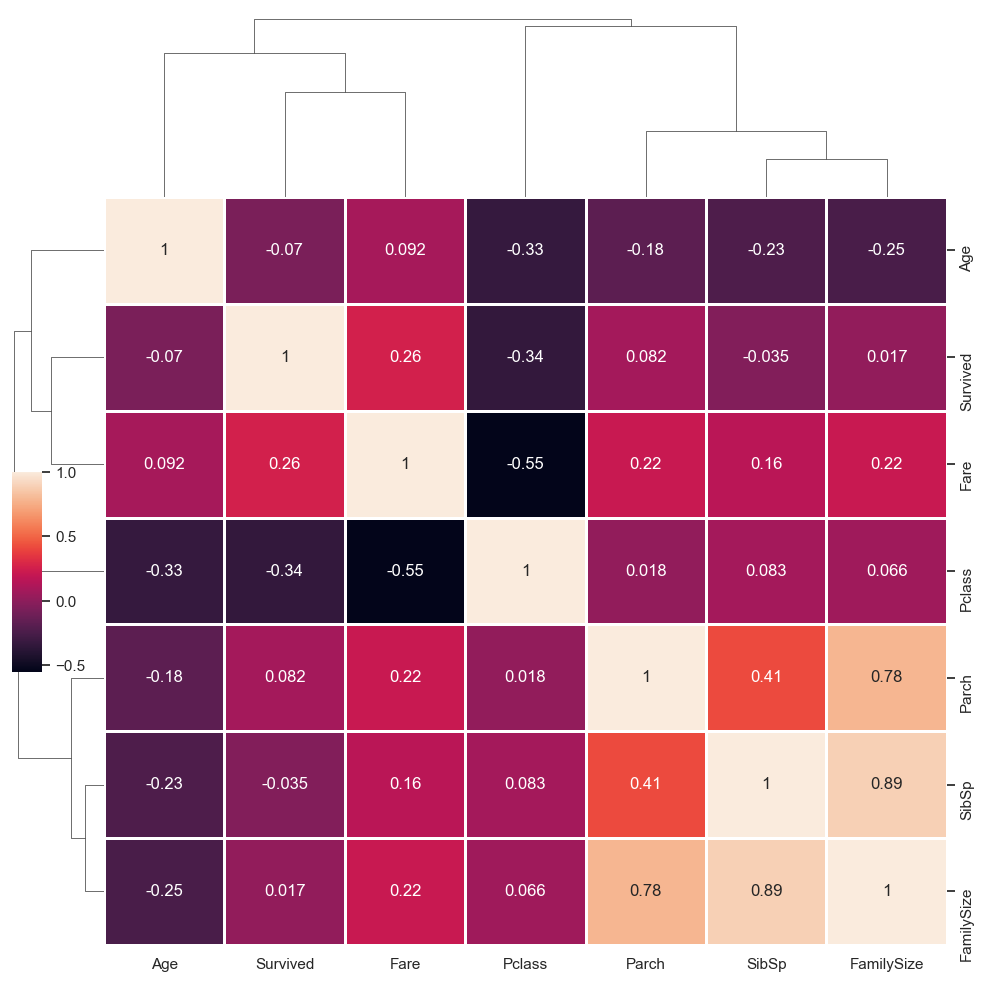

In [375]:
ax = sns.clustermap(df.drop('PassengerId', axis=1).corr(numeric_only=True), annot=True, dendrogram_ratio=(
    0.1, 0.2), cbar_pos=(.02, .32, .03, .2), linewidths=.75)


# Classification

In [376]:
# encode the categorical data
oe = OrdinalEncoder()
df[['Sex', 'Ticket', 'Cabin', 'Embarked', 'FamilyName']] = oe.fit_transform(
    df[['Sex', 'Ticket', 'Cabin', 'Embarked', 'FamilyName']])
df.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyName
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,523.0,7.2500,146.0,3.0,2,73.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,596.0,71.2833,81.0,0.0,2,136.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,669.0,7.9250,146.0,3.0,1,251.0


In [377]:
# split x and y
x = df.drop(['PassengerId', 'Survived', 'Name'], axis=1)
y = df['Survived']


In [378]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)


## Hypertuning using Grid Search
https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

### Logistic Regression

In [379]:
# model
lr_model = LogisticRegression()

# params
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr_params = dict(solver=solvers, penalty=penalty, C=c_values)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
lr_gsearch = GridSearchCV(estimator=lr_model, param_grid=lr_params,
                          cv=cv, scoring='accuracy', error_score=0, n_jobs=-1)
lr_gresult = lr_gsearch.fit(x_train, y_train)

# summarize results
print("Best: {} using {}".format(lr_gresult.best_score_, lr_gresult.best_params_))
means = lr_gresult.cv_results_['mean_test_score']
stds = lr_gresult.cv_results_['std_test_score']
params = lr_gresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean ({}) / Std ({}) with: {}".format(mean, stdev, param))


/Users/sergani/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sergani/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Best: 0.7982761563406725 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Mean (0.7950503498890595) / Std (0.04329658866174913) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Mean (0.7826932923707116) / Std (0.05105060872141606) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Mean (0.7955879842976616) / Std (0.04273013342534213) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Mean (0.7950503498890595) / Std (0.04329658866174913) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Mean (0.7853814644137224) / Std (0.051290723672265406) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Mean (0.7977299880525686) / Std (0.04345898224496071) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Mean (0.7982761563406725) / Std (0.044013623968171385) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Mean (0.7821812596006145) / Std (0.04852022277279969) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Mean (0.7923707117255502) / Std (0.04753574

### KNN

In [380]:
# model
knn_model = KNeighborsClassifier()

# params
n_neighbors = range(1, 31, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
knn_params = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
knn_gsearch = GridSearchCV(estimator=knn_model, param_grid=knn_params,
                           cv=cv, scoring='accuracy', error_score=0, n_jobs=-1)
knn_gresult = knn_gsearch.fit(x_train, y_train)

# summarize results
print("Best: {} using {}".format(
    knn_gresult.best_score_, knn_gresult.best_params_))
means = knn_gresult.cv_results_['mean_test_score']
stds = knn_gresult.cv_results_['std_test_score']
params = knn_gresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean ({}) / Std ({}) with: {}".format(mean, stdev, param))


Best: 0.6720600785116915 using {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
Mean (0.6360556408943506) / Std (0.05267689530627287) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Mean (0.6360556408943506) / Std (0.05267689530627287) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
Mean (0.6441969619388974) / Std (0.05306438807470897) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Mean (0.6441798941798942) / Std (0.0553925467492675) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Mean (0.6378392217101895) / Std (0.05105656571647646) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Mean (0.6489844683393071) / Std (0.040726455517963604) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Mean (0.6393923877794846) / Std (0.04263472221368092) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Mean (0.6457927974057006) / Std 

### SVM

In [381]:
# model
svm_model = SVC()

# params
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
svm_params = dict(kernel=kernel, C=C, gamma=gamma)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
svm_gsearch = GridSearchCV(estimator=svm_model, param_grid=svm_params,
                           cv=cv, scoring='accuracy', error_score=0, n_jobs=-1)
svm_gresult = svm_gsearch.fit(x_train, y_train)

# summarize results
print("Best: {} using {}".format(
    svm_gresult.best_score_, svm_gresult.best_params_))
means = svm_gresult.cv_results_['mean_test_score']
stds = svm_gresult.cv_results_['std_test_score']
params = svm_gresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean ({}) / Std ({}) with: {}".format(mean, stdev, param))


Best: 0.6869260966035159 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
Mean (0.682078853046595) / Std (0.04331145544611933) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
Mean (0.6869260966035159) / Std (0.043109172526663506) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
Mean (0.5408260795357569) / Std (0.05484202166820473) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
Mean (0.6596518177163339) / Std (0.034584683547062484) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Mean (0.6730158730158728) / Std (0.04500975808889344) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Mean (0.5403055128861581) / Std (0.05295157802642293) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
Mean (0.6409199522102749) / Std (0.024816311764386402) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
Mean (0.6564260112647209) / Std (0.036425832765370196) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
Mean (0.5408516811742619) / Std (0.05412667886225971) with: {'C': 1.

## Logistic Regression

In [382]:
# model
# Best: 0.7982761563406725 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
lr_model = LogisticRegression(C=lr_gresult.best_params_['C'], penalty=lr_gresult.best_params_[
                              'penalty'], solver=lr_gresult.best_params_['solver'])
lr_model.fit(x_train, y_train)


LogisticRegression(solver='newton-cg')

In [383]:
lr_y_pred = lr_model.predict(x_test)
lr_y_pred


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0])

In [384]:
lr_y_pred_proba = lr_model.predict_proba(x_test)
lr_y_pred_proba


array([[0.86750493, 0.13249507],
       [0.79898237, 0.20101763],
       [0.84319226, 0.15680774],
       [0.10752551, 0.89247449],
       [0.22544868, 0.77455132],
       [0.06052366, 0.93947634],
       [0.36621557, 0.63378443],
       [0.91747217, 0.08252783],
       [0.23542005, 0.76457995],
       [0.09272804, 0.90727196],
       [0.65655468, 0.34344532],
       [0.93159534, 0.06840466],
       [0.63168411, 0.36831589],
       [0.77687305, 0.22312695],
       [0.78278225, 0.21721775],
       [0.08365121, 0.91634879],
       [0.70613637, 0.29386363],
       [0.37179408, 0.62820592],
       [0.75917912, 0.24082088],
       [0.71415917, 0.28584083],
       [0.88198487, 0.11801513],
       [0.63790838, 0.36209162],
       [0.3365292 , 0.6634708 ],
       [0.87698517, 0.12301483],
       [0.90724565, 0.09275435],
       [0.9332337 , 0.0667663 ],
       [0.59642058, 0.40357942],
       [0.813961  , 0.186039  ],
       [0.9199429 , 0.0800571 ],
       [0.44470411, 0.55529589],
       [0.

In [385]:
# classification report
lr_class_report = classification_report(y_test, lr_y_pred)
print(lr_class_report)


              precision    recall  f1-score   support

           0       0.82      0.85      0.84       157
           1       0.78      0.74      0.76       111

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



[[134  23]
 [ 29  82]]


<AxesSubplot: >

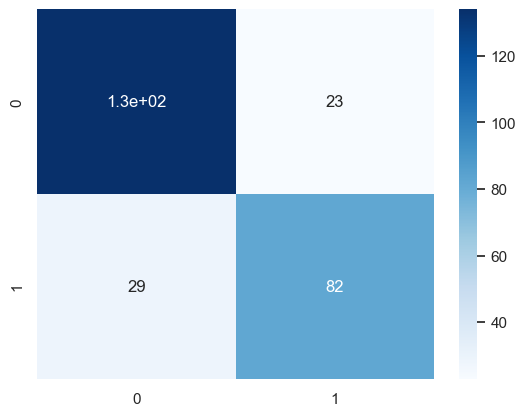

In [386]:
# evaluate the model
lr_con_matrix = confusion_matrix(y_test, lr_y_pred)
print(lr_con_matrix)

sns.heatmap(lr_con_matrix, annot=True, cmap='Blues')


In [387]:
# accuracy, recall, precission and f1 score
lr_accuracy = metrics.accuracy_score(y_test, lr_y_pred)
lr_recall = metrics.recall_score(y_test, lr_y_pred)
lr_precission = metrics.precision_score(y_test, lr_y_pred)
lr_f1_score = metrics.f1_score(y_test, lr_y_pred)


## K-Nearest Neighbor (KNN)

In [388]:
# model
# Best: 0.6720600785116915 using {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}

knn_model = KNeighborsClassifier(metric=knn_gresult.best_params_['metric'], n_neighbors=knn_gresult.best_params_[
                                 'n_neighbors'], weights=knn_gresult.best_params_['weights'])
knn_model.fit(x_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=17, weights='distance')

In [389]:
knn_y_pred = knn_model.predict(x_test)


In [390]:
knn_y_pred_proba = knn_model.predict_proba(x_test)
knn_y_pred_proba


array([[0.32213885, 0.67786115],
       [0.65253336, 0.34746664],
       [0.8703904 , 0.1296096 ],
       [0.67458089, 0.32541911],
       [0.11955403, 0.88044597],
       [0.37984204, 0.62015796],
       [0.83341655, 0.16658345],
       [0.94270986, 0.05729014],
       [0.88470845, 0.11529155],
       [0.55290923, 0.44709077],
       [0.08761703, 0.91238297],
       [0.74875047, 0.25124953],
       [1.        , 0.        ],
       [0.46147722, 0.53852278],
       [0.68058784, 0.31941216],
       [0.46113224, 0.53886776],
       [0.4275855 , 0.5724145 ],
       [0.79301816, 0.20698184],
       [0.48804367, 0.51195633],
       [0.45469997, 0.54530003],
       [0.84407146, 0.15592854],
       [0.61760781, 0.38239219],
       [0.67064094, 0.32935906],
       [0.92930772, 0.07069228],
       [0.90192416, 0.09807584],
       [0.98861125, 0.01138875],
       [0.42424434, 0.57575566],
       [0.43773564, 0.56226436],
       [0.98720141, 0.01279859],
       [0.67388164, 0.32611836],
       [0.

In [391]:
# classification report
knn_class_report = classification_report(y_test, knn_y_pred)
print(knn_class_report)


              precision    recall  f1-score   support

           0       0.68      0.86      0.76       157
           1       0.68      0.42      0.52       111

    accuracy                           0.68       268
   macro avg       0.68      0.64      0.64       268
weighted avg       0.68      0.68      0.66       268



[[135  22]
 [ 64  47]]


<AxesSubplot: >

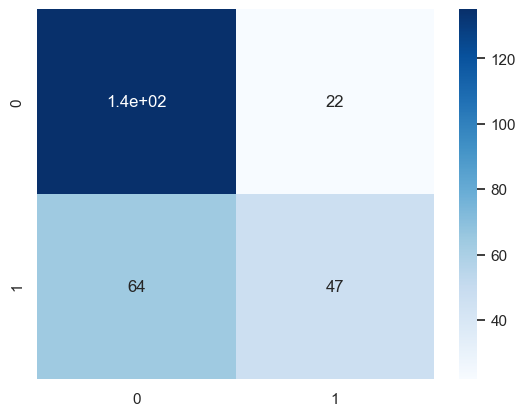

In [392]:
# evaluate the model
knn_con_matrix = confusion_matrix(y_test, knn_y_pred)
print(knn_con_matrix)

sns.heatmap(knn_con_matrix, annot=True, cmap='Blues')


In [393]:
# accuracy, recall, precission and f1 score
knn_accuracy = metrics.accuracy_score(y_test, knn_y_pred)
knn_recall = metrics.recall_score(y_test, knn_y_pred)
knn_precission = metrics.precision_score(y_test, knn_y_pred)
knn_f1_score = metrics.f1_score(y_test, knn_y_pred)


## Support Vector Machines (SVM)

In [394]:
# model
# Best: 0.6869260966035159 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}

svm_model = SVC(C=svm_gresult.best_params_['C'], gamma=svm_gresult.best_params_[
                'gamma'], kernel=svm_gresult.best_params_['kernel'], probability=True)
svm_model.fit(x_train, y_train)


SVC(C=50, probability=True)

In [395]:
svm_y_pred = svm_model.predict(x_test)


In [396]:
svm_y_pred_proba = svm_model.predict_proba(x_test)
svm_y_pred_proba


array([[0.61725042, 0.38274958],
       [0.70833183, 0.29166817],
       [0.72574663, 0.27425337],
       [0.3873483 , 0.6126517 ],
       [0.52257747, 0.47742253],
       [0.3209472 , 0.6790528 ],
       [0.70770939, 0.29229061],
       [0.72127143, 0.27872857],
       [0.71149926, 0.28850074],
       [0.35447819, 0.64552181],
       [0.31256724, 0.68743276],
       [0.77085698, 0.22914302],
       [0.71413217, 0.28586783],
       [0.71901758, 0.28098242],
       [0.64288342, 0.35711658],
       [0.48006805, 0.51993195],
       [0.36733362, 0.63266638],
       [0.70784705, 0.29215295],
       [0.52619675, 0.47380325],
       [0.56981082, 0.43018918],
       [0.71952274, 0.28047726],
       [0.51629089, 0.48370911],
       [0.72644438, 0.27355562],
       [0.71696582, 0.28303418],
       [0.73987287, 0.26012713],
       [0.68266143, 0.31733857],
       [0.6659557 , 0.3340443 ],
       [0.6916663 , 0.3083337 ],
       [0.66406557, 0.33593443],
       [0.73863974, 0.26136026],
       [0.

In [397]:
# classification report
svm_class_report = classification_report(y_test, svm_y_pred)
print(svm_class_report)


              precision    recall  f1-score   support

           0       0.69      0.94      0.79       157
           1       0.82      0.41      0.54       111

    accuracy                           0.72       268
   macro avg       0.75      0.67      0.67       268
weighted avg       0.74      0.72      0.69       268



[[147  10]
 [ 66  45]]


<AxesSubplot: >

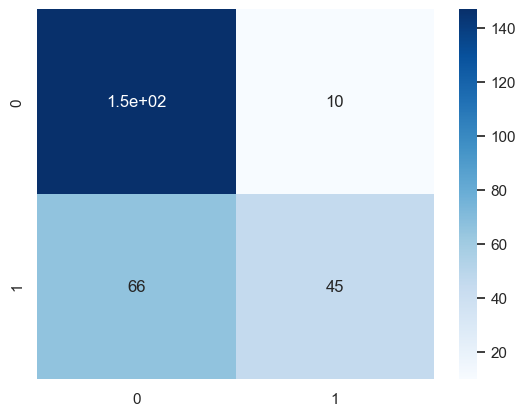

In [398]:
# evaluate the model
svm_con_matrix = confusion_matrix(y_test, svm_y_pred)
print(svm_con_matrix)

sns.heatmap(svm_con_matrix, annot=True, cmap='Blues')


In [399]:
# accuracy, recall, precission and f1 score
svm_accuracy = metrics.accuracy_score(y_test, svm_y_pred)
svm_recall = metrics.recall_score(y_test, svm_y_pred)
svm_precission = metrics.precision_score(y_test, svm_y_pred)
svm_f1_score = metrics.f1_score(y_test, svm_y_pred)


## 

## Performance Comparison

### Accuracy, Recall, Precission and F1 score

In [400]:
print('Logistic Regression:')
print('Accuracy: ', lr_accuracy)
print('Recall: ', lr_recall)
print('Precission: ', lr_precission)
print('F1 Score: ', lr_f1_score)
print('---------------------')
print('KNN:')
print('Accuracy: ', knn_accuracy)
print('Recall: ', knn_recall)
print('Precission: ', knn_precission)
print('F1 Score: ', knn_f1_score)
print('---------------------')
print('SVM:')
print('Accuracy: ', svm_accuracy)
print('Recall: ', svm_recall)
print('Precission: ', svm_precission)
print('F1 Score: ', svm_f1_score)


Logistic Regression:
Accuracy:  0.8059701492537313
Recall:  0.7387387387387387
Precission:  0.780952380952381
F1 Score:  0.7592592592592593
---------------------
KNN:
Accuracy:  0.6791044776119403
Recall:  0.42342342342342343
Precission:  0.6811594202898551
F1 Score:  0.5222222222222223
---------------------
SVM:
Accuracy:  0.7164179104477612
Recall:  0.40540540540540543
Precission:  0.8181818181818182
F1 Score:  0.5421686746987953


### ROC / AUC

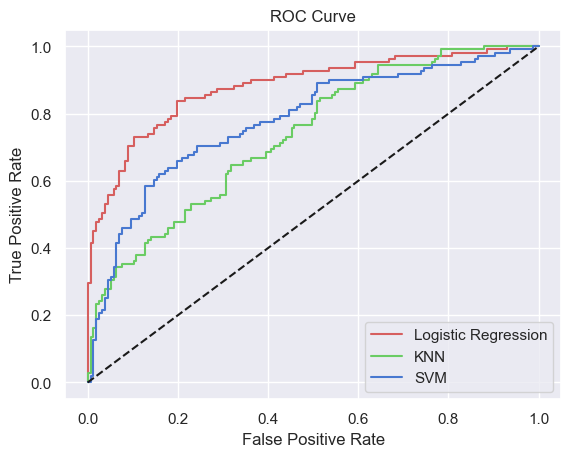

In [401]:
# ROC curve plotting
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_y_pred_proba[:, 1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_y_pred_proba[:, 1])
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_y_pred_proba[:, 1])

plt.plot(lr_fpr, lr_tpr, c='r')
plt.plot(knn_fpr, knn_tpr, c='g')
plt.plot(svm_fpr, svm_tpr, c='b')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Logistic Regression', 'KNN', 'SVM'], loc="lower right")
plt.title('ROC Curve')
plt.show()


In [402]:
# calculate AUC
lr_auc = roc_auc_score(y_test, lr_y_pred_proba[:, 1])
knn_auc = roc_auc_score(y_test, knn_y_pred_proba[:, 1])
svm_auc = roc_auc_score(y_test, svm_y_pred_proba[:, 1])

print('LR AUC: {}'.format(lr_auc))
print('KNN AUC: {}'.format(knn_auc))
print('SVM AUC: {}'.format(svm_auc))


LR AUC: 0.8805875939633901
KNN AUC: 0.733918632007804
SVM AUC: 0.7799391748436335
